/home/miguel-bge/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in Matplotlib 2.2 and will be removed in 3.1.


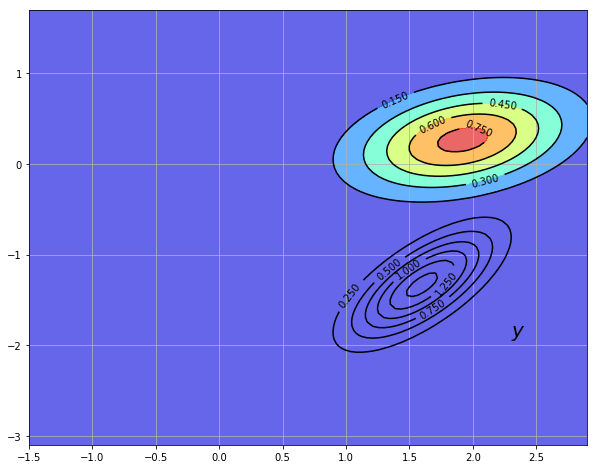

In [4]:
from scipy import linalg
import numpy as np
import matplotlib.cm as cm
from matplotlib.mlab import bivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

# == Set up the Gaussian prior density p == #
Σ = [[0.4, 0.3], [0.3, 0.45]]
Σ = np.matrix(Σ)
x_hat = np.matrix([0.2, -0.2]).T
# == Define the matrices G and R from the equation y = G x + N(0, R) == #
G = [[1, 0], [0, 1]]
G = np.matrix(G)
R = 0.5 * Σ
# == The matrices A and Q == #
A = [[1.2, 0], [0, -0.2]]
A = np.matrix(A)
Q = 0.3 * Σ
# == The observed value of y == #
y = np.matrix([2.3, -1.9]).T

# == Set up grid for plotting == #
x_grid = np.linspace(-1.5, 2.9, 100)
y_grid = np.linspace(-3.1, 1.7, 100)
X, Y = np.meshgrid(x_grid, y_grid)


def gen_gaussian_plot_vals(μ, C):
    "Z values for plotting the bivariate Gaussian N(μ, C)"
    m_x, m_y = float(μ[0]), float(μ[1])
    s_x, s_y = np.sqrt(C[0, 0]), np.sqrt(C[1, 1])
    s_xy = C[0, 1]
    return bivariate_normal(X, Y, s_x, s_y, m_x, m_y, s_xy)

# Plot the figure

fig, ax = plt.subplots(figsize=(10, 8))
ax.grid()

# # Density 1
# Z = gen_gaussian_plot_vals(x_hat, Σ)
# cs1 = ax.contour(X, Y, Z, 6, colors="black")
# ax.clabel(cs1, inline=1, fontsize=10)

# Density 2
M = Σ * G.T * linalg.inv(G * Σ * G.T + R)
x_hat_F = x_hat + M * (y - G * x_hat)
Σ_F = Σ - M * G * Σ
Z_F = gen_gaussian_plot_vals(x_hat_F, Σ_F)
cs2 = ax.contour(X, Y, Z_F, 6, colors="black")
ax.clabel(cs2, inline=1, fontsize=10)

# Density 3
new_x_hat = A * x_hat_F
new_Σ = A * Σ_F * A.T + Q
new_Z = gen_gaussian_plot_vals(new_x_hat, new_Σ)
cs3 = ax.contour(X, Y, new_Z, 6, colors="black")
ax.clabel(cs3, inline=1, fontsize=10)
ax.contourf(X, Y, new_Z, 6, alpha=0.6, cmap=cm.jet)
ax.text(float(y[0]), float(y[1]), "$y$", fontsize=20, color="black")

plt.show()